In [1]:
import pandas as pd
import geopandas as gpd
import movingpandas as mpd
import numpy as np
import matplotlib.pyplot as plt
import folium
import warnings
import sys
#warnings.filterwarnings('ignore')

print("Geopandas has version {}".format(gpd.__version__))
print("Movingpandas has version {}".format(mpd.__version__))

Geopandas has version 0.13.2
Movingpandas has version 0.17.1


In [2]:
# add paths for modules
sys.path.append('../src/visualization')
print(sys.path)

# import modules
import visualize

['/Users/janhendrikwebert/maritime_route_prediction/notebooks', '/Users/janhendrikwebert/miniforge3/envs/env_geo/lib/python311.zip', '/Users/janhendrikwebert/miniforge3/envs/env_geo/lib/python3.11', '/Users/janhendrikwebert/miniforge3/envs/env_geo/lib/python3.11/lib-dynload', '', '/Users/janhendrikwebert/miniforge3/envs/env_geo/lib/python3.11/site-packages', '../src/visualization']


In [3]:
# read data from file
filename = '../data/raw/routes_all.parquet'
df = gpd.read_parquet(filename)

In [4]:
# print information about loaded data
print(df.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 58546 entries, 0 to 58545
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   mmsi             58546 non-null  int64         
 1   imo              58546 non-null  float64       
 2   length           58546 non-null  float64       
 3   start_lon        58546 non-null  float64       
 4   start_lat        58546 non-null  float64       
 5   stop_lon         58546 non-null  float64       
 6   stop_lat         58546 non-null  float64       
 7   start_loc        58546 non-null  object        
 8   stop_loc         58546 non-null  object        
 9   start_geom       58546 non-null  object        
 10  stop_geom        58546 non-null  object        
 11  start_time       58546 non-null  datetime64[us]
 12  stop_time        58546 non-null  datetime64[us]
 13  cog              58546 non-null  object        
 14  avg_cog          58546 non-nul

In [5]:
# print first 5 lines
df.head()

,mmsi,imo,length,start_lon,start_lat,stop_lon,stop_lat,start_loc,stop_loc,start_geom,...,avg_cog,sog,avg_sog,loc,ts,line_geom,start_label,stop_label,cluster_nr,unique_route_id
0,232003690,1002495.0,55.0,10.9382,59.2101,10.372400,58.907800,POINT (10.9382 59.2101),POINT (10.3724 58.9078),0101000020E6100000E3361AC05BE02540DE718A8EE49A...,...,214.513907,"[1.1, 2.6, 2.6, 1.43, 1.290909090909091, 1.8, ...",6.239742,"LINESTRING (10.9382 59.2101, 10.9385 59.2095, ...","[Timestamp('2019-07-14 13:49:16'), Timestamp('...","LINESTRING (10.93820 59.21010, 10.93850 59.209...",-1,0,-1,1
1,319072300,1012189.0,66.0,10.5514,59.3742,11.043038,58.973550,POINT (10.5514 59.3742),POINT (11.0430375 58.97355),0101000020E61000005F07CE19511A2540E4141DC9E5AF...,...,151.828567,"[9.6, 9.6, 9.7, 9.6, 9.6, 9.4, 9.3, 9.2, 8.91,...",10.150689,"LINESTRING (10.5514 59.3742, 10.55159090909091...","[Timestamp('2019-07-02 00:00:02'), Timestamp('...","LINESTRING (10.55140 59.37420, 10.55159 59.371...",-1,16,-1,2
2,258373000,5071729.0,63.0,10.3976,58.9075,10.751600,59.904900,POINT (10.3976 58.9075),POINT (10.7516 59.9049),0101000020E61000007AC7293A92CB24405C8FC2F52874...,...,166.699491,"[3.5, 3.590909090909091, 3.5, 3.5, 3.609090909...",4.033145,"LINESTRING (10.3976 58.9075, 10.39878181818181...","[Timestamp('2019-05-13 14:39:43'), Timestamp('...","LINESTRING (10.39760 58.90750, 10.39878 58.908...",0,1,1,3
3,258373000,5071729.0,63.0,10.7517,59.9050,10.722100,59.906200,POINT (10.7517 59.905),POINT (10.7221 59.9062),0101000020E610000070CE88D2DE802540A4703D0AD7F3...,...,153.546888,"[0.4, 2.036363636363636, 2.6, 2.79375, 3.4, 3....",3.229305,"LINESTRING (10.7517 59.905, 10.75129090909091 ...","[Timestamp('2019-05-16 15:30:33'), Timestamp('...","LINESTRING (10.75170 59.90500, 10.75129 59.904...",1,1,14,4
4,258373000,5071729.0,63.0,10.7219,59.9057,10.751453,59.904857,POINT (10.7219 59.9057),POINT (10.751453107344632 59.904857062146895),0101000020E6100000FDF675E09C7125405DFE43FAEDF3...,...,111.234543,"[2.6, 3.425, 2.92, 2.525, 3.5, 4.9666666666666...",4.036952,"LINESTRING (10.7219 59.9057, 10.72194642857142...","[Timestamp('2019-05-18 10:25:34'), Timestamp('...","LINESTRING (10.72190 59.90570, 10.72195 59.904...",1,1,14,5


916 unique mmsi
908 unique imo
39 unique start_label
39 unique stop_label
47 unique cluster_nr
58546 unique unique_route_id
[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]


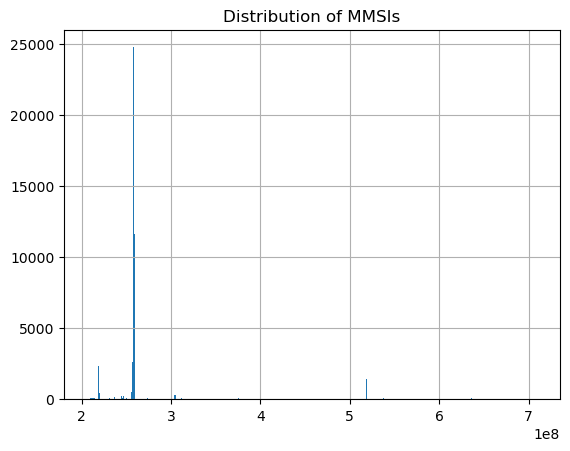

In [6]:
# some dataset characteristics
columns = ['mmsi', 'imo', 'start_label', 'stop_label', 'cluster_nr', 'unique_route_id']
for column in columns:
    print(f'{df[column].nunique()} unique {column}')

# print start and stop labels
print(sorted(df['start_label'].unique()))
print(sorted(df['stop_label'].unique()))

# plot ditribution of mmsi
plt.subplot(1, 1, 1)
df.mmsi.hist(bins=df.mmsi.nunique())
plt.title('Distribution of MMSIs')
plt.show()

In [7]:
# drop superfluous geolocation columns to enable easy plotting
df.drop(['start_loc', 'stop_loc', 'loc', 'start_geom', 'stop_geom'], axis=1, inplace=True)

In [8]:
# plot data (10000 random trajectories)
n_trajectories = 100  # -1 selects all trajectories
columns = ['mmsi', 'imo', 'start_label', 'stop_label', 'cluster_nr', 'unique_route_id', 'line_geom', 'length']
if n_trajectories > 0:
    selection = np.random.randint(0, high=len(df), size=n_trajectories)
    map = df[columns].iloc[selection].explore(cmap='jet', column='start_label', name='trajectories')
else:
    map = df[columns].explore(cmap='jet', column='start_label', name='trajectories')

/Users/janhendrikwebert/miniforge3/envs/env_geo/lib/python3.11/site-packages/geopandas/explore.py:400: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(gdf[column]):


In [9]:
# get a bounding box of the geographic area
bbox = visualize.get_bounding_box(df)
map = bbox.explore(m=map, color='red', name='bounds')
folium.LayerControl().add_to(map)
map